# Выбор семейства распределений в наивном байесе

## Библиотеки

In [2]:
from sklearn import datasets, naive_bayes, cross_validation

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
import numpy as np

## Загружаем и изучаем данные

### digits

In [8]:
digits = datasets.load_digits()

In [12]:
print digits

{'images': array([[[  0.,   0.,   5., ...,   1.,   0.,   0.],
        [  0.,   0.,  13., ...,  15.,   5.,   0.],
        [  0.,   3.,  15., ...,  11.,   8.,   0.],
        ..., 
        [  0.,   4.,  11., ...,  12.,   7.,   0.],
        [  0.,   2.,  14., ...,  12.,   0.,   0.],
        [  0.,   0.,   6., ...,   0.,   0.,   0.]],

       [[  0.,   0.,   0., ...,   5.,   0.,   0.],
        [  0.,   0.,   0., ...,   9.,   0.,   0.],
        [  0.,   0.,   3., ...,   6.,   0.,   0.],
        ..., 
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   0., ...,  10.,   0.,   0.]],

       [[  0.,   0.,   0., ...,  12.,   0.,   0.],
        [  0.,   0.,   3., ...,  14.,   0.,   0.],
        [  0.,   0.,   8., ...,  16.,   0.,   0.],
        ..., 
        [  0.,   9.,  16., ...,   0.,   0.,   0.],
        [  0.,   3.,  13., ...,  11.,   5.,   0.],
        [  0.,   0.,   0., ...,  16.,   9.,   0.]],

       ..., 
       [[ 

In [11]:
print digits.DESCR

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [18]:
digits.images[:5]

array([[[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
        [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
        [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
        [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
        [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
        [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
        [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
        [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]],

       [[  0.,   0.,   0.,  12.,  13.,   5.,   0.,   0.],
        [  0.,   0.,   0.,  11.,  16.,   9.,   0.,   0.],
        [  0.,   0.,   3.,  15.,  16.,   6.,   0.,   0.],
        [  0.,   7.,  15.,  16.,  16.,   2.,   0.,   0.],
        [  0.,   0.,   1.,  16.,  16.,   3.,   0.,   0.],
        [  0.,   0.,   1.,  16.,  16.,   6.,   0.,   0.],
        [  0.,   0.,   1.,  16.,  16.,   6.,   0.,   0.],
        [  0.,   0.,   0.,  11.,  16.,  10.,   0.,   0.]],

       [[  0.,   0.,   0.,   4.,  15.,  12.,   0.,   0.],
        [ 

In [15]:
digits.images.shape

(1797L, 8L, 8L)

In [110]:
digits.target[:50]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3,
       5, 1, 0, 0])

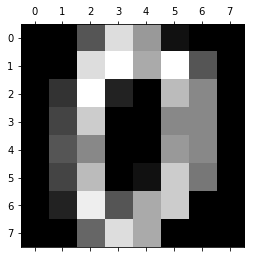

In [111]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

In [16]:
digits.data.shape

(1797L, 64L)

In [17]:
digits.data[:5]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
         15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
          8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
          5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
          1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
          0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.],
       [  0.,   0.,   0.,  12.,  13.,   5.,   0.,   0.,   0.,   0.,   0.,
         11.,  16.,   9.,   0.,   0.,   0.,   0.,   3.,  15.,  16.,   6.,
          0.,   0.,   0.,   7.,  15.,  16.,  16.,   2.,   0.,   0.,   0.,
          0.,   1.,  16.,  16.,   3.,   0.,   0.,   0.,   0.,   1.,  16.,
         16.,   6.,   0.,   0.,   0.,   0.,   1.,  16.,  16.,   6.,   0.,
          0.,   0.,   0.,   0.,  11.,  16.,  10.,   0.,   0.],
       [  0.,   0.,   0.,   4.,  15.,  12.,   0.,   0.,   0.,   0.,   3.,
         16.,  15.,  14.,   0.,   0.,   0.,   0.,   8.,  13.

### breast_cancer

In [50]:
breast_cancer = datasets.load_breast_cancer()

In [51]:
print breast_cancer

{'target_names': array(['malignant', 'benign'], 
      dtype='|S9'), 'data': array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
          1.86000000e-01,   2.75000000e-01,   8.90200000e-02],
       [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...,
          2.43000000e-01,   3.61300000e-01,   8.75800000e-02],
       ..., 
       [  1.66000000e+01,   2.80800000e+01,   1.08300000e+02, ...,
          1.41800000e-01,   2.21800000e-01,   7.82000000e-02],
       [  2.06000000e+01,   2.93300000e+01,   1.40100000e+02, ...,
          2.65000000e-01,   4.08700000e-01,   1.24000000e-01],
       [  7.76000000e+00,   2.45400000e+01,   4.79200000e+01, ...,
          0.00000000e+00,   2.87100000e-01,   7.03900000e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [52]:
print breast_cancer.DESCR

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [55]:
breast_cancer.data.shape

(569L, 30L)

In [54]:
print breast_cancer.data[:5]

[[  1.79900000e+01   1.03800000e+01   1.22800000e+02   1.00100000e+03
    1.18400000e-01   2.77600000e-01   3.00100000e-01   1.47100000e-01
    2.41900000e-01   7.87100000e-02   1.09500000e+00   9.05300000e-01
    8.58900000e+00   1.53400000e+02   6.39900000e-03   4.90400000e-02
    5.37300000e-02   1.58700000e-02   3.00300000e-02   6.19300000e-03
    2.53800000e+01   1.73300000e+01   1.84600000e+02   2.01900000e+03
    1.62200000e-01   6.65600000e-01   7.11900000e-01   2.65400000e-01
    4.60100000e-01   1.18900000e-01]
 [  2.05700000e+01   1.77700000e+01   1.32900000e+02   1.32600000e+03
    8.47400000e-02   7.86400000e-02   8.69000000e-02   7.01700000e-02
    1.81200000e-01   5.66700000e-02   5.43500000e-01   7.33900000e-01
    3.39800000e+00   7.40800000e+01   5.22500000e-03   1.30800000e-02
    1.86000000e-02   1.34000000e-02   1.38900000e-02   3.53200000e-03
    2.49900000e+01   2.34100000e+01   1.58800000e+02   1.95600000e+03
    1.23800000e-01   1.86600000e-01   2.41600000e-01 

In [56]:
breast_cancer.target.shape

(569L,)

In [58]:
print breast_cancer.target[:25]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0]


In [68]:
print 'доброкачественные сэмплы:', sum(breast_cancer.target==1)

доброкачественные сэмплы: 357


### сравнение выборок с помощью sklearn.cross_validation.cross_val_score

#### создаем 3 наивных байесовских классификатора

In [71]:
clf_MultinomialNB = naive_bayes.MultinomialNB()

In [72]:
clf_BernoulliNB = naive_bayes.BernoulliNB()

In [73]:
clf_GaussianNB = naive_bayes.GaussianNB()

In [78]:
clfs = [clf_MultinomialNB, clf_BernoulliNB, clf_GaussianNB]

In [76]:
cross_validation.cross_val_score(clf_MultinomialNB, digits.data, digits.target).mean()

0.87087714897350532

#### сравнения для breast_cancer

In [93]:
for clf in clfs:
    print clf,'\n\t', cross_validation.cross_val_score(clf, breast_cancer.data, breast_cancer.target).mean(), '\n'

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) 
	0.894579040193 

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True) 
	0.627420402859 

GaussianNB(priors=None) 
	0.936749280609 



#### сравнения для digits

In [92]:
for clf in clfs:
    print clf,'\n\t', cross_validation.cross_val_score(clf, digits.data, digits.target).mean(), '\n'

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) 
	0.870877148974 

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True) 
	0.825823650778 

GaussianNB(priors=None) 
	0.818600380355 

